# Plotting SEN2 data from a NetCDF

In [1]:
from datetime import date
import matplotlib.pyplot as plt
import rasterio
from matplotlib import colors
from pathlib import Path
from rasterio.plot import show

# Test should run from root
import os

os.chdir("..")

In [2]:
from omegaconf import OmegaConf
from metaearth.api import extract_assets
from metaearth.config import ConfigSchema

cfg = OmegaConf.load("config/sen2.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

# Constrain the test to only pull one item
for collection in cfg["collections"].keys():
    cfg["collections"][collection]["max_items"] = 1

successfully_extracted_assets, failed_assets = extract_assets(cfg)
print(
    f"Successfully extracted {len(successfully_extracted_assets)} assets. {len(failed_assets)} failed."
)

/Users/raymond/opt/anaconda3/envs/metaearth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
16:09:11 INFO - Extraction details for collection sentinel-2-l2a:
		provider=<Microsoft Planetary Computer (MPC)> 
		timerange=<2022-01-01/2022-01-02>,
		aoi_file=<config/aoi/demo.json>, 
		output_dir=<data>,
		assets=<['all']>
16:09:11 INFO - 
Microsoft Planetary Computer (MPC) returned 1 items for sentinel-2-l2a for datetime 2022-01-01/2022-01-02

16:09:11 INFO - 24 assets did not specify file size, will query size directly with http get request (this may take a few moments)
system.query_asset_sizes=False can be used to disable this behavior
100%|███████████████████████████████████████████| 24/24 [00:02<00:00, 10.03it/s]
16:09:14 INFO - 6 assets have unknown file size
16:09:14 INFO - 24 assets to extract from 1 

Successfully extracted 0 assets. 0 failed.


In [13]:
# Find the first GeoTIFF file and load it
# We avoid hardcoding the path here in case the API changes down the road

fpath = Path(cfg["default_collection"]["outdir"])
collection_for_gt = "sentinel-2-l2a"
gt_files = list((fpath / collection_for_gt).glob("**/*.tif"))


gt_file_fpath = gt_files[0]

data = rasterio.open(gt_file_fpath)

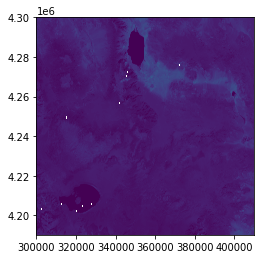

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


ERROR 1: PROJ: proj_identify: Cannot find proj.db


In [14]:
show(data)
print(data.crs)